<a href="https://colab.research.google.com/github/brandim04/Projeto-Analise-Exploratoria--Larissa-e-Vithor-/blob/main/CD_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# BLOC0 1 — IMPORTS GERAIS
import pandas as pd
import numpy as np
from datetime import datetime

# Pré-processamento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

print("Imports carregados com sucesso.")


Imports carregados com sucesso.


In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


In [37]:
# BLOCO 3 — CARREGAR DATASETS
orders = pd.read_csv(f"{path}/olist_orders_dataset.csv")
order_items = pd.read_csv(f"{path}/olist_order_items_dataset.csv")
products = pd.read_csv(f"{path}/olist_products_dataset.csv")

print("Shapes:")
print("orders:", orders.shape)
print("order_items:", order_items.shape)
print("products:", products.shape)

Shapes:
orders: (99441, 8)
order_items: (112650, 7)
products: (32951, 9)


In [38]:
# 4 — EXPLORAÇÃO DE DADOS (EDA)
print("=== Amostras dos datasets ===")
print("\nOrders:")
display(orders.head())

print("\nOrder Items:")
display(order_items.head())

print("\nProducts:")
display(products.head())

print("\n=== Verificando duplicatas ===")
duplicate_rows_orders = orders[orders.duplicated()]
print("Orders: Número de linhas duplicadas:\n", len(duplicate_rows_orders))
print("=============================")

duplicate_rows_items = order_items[order_items.duplicated()]
print("Order Items: Número de linhas duplicadas:\n", len(duplicate_rows_items))
print("=============================")

duplicate_rows_products = products[products.duplicated()]
print("Products: Número de linhas duplicadas:\n", len(duplicate_rows_products))
print("=============================")

# Estatísticas básicas
print("\nResumo numérico — Orders:")
display(orders.describe())

print("\nResumo numérico — Order Items:")
display(order_items.describe())

print("\nResumo numérico — Products:")
display(products.describe())

=== Amostras dos datasets ===

Orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Order Items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



=== Verificando duplicatas ===
Orders: Número de linhas duplicadas:
 0
Order Items: Número de linhas duplicadas:
 0
Products: Número de linhas duplicadas:
 0

Resumo numérico — Orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



Resumo numérico — Order Items:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000



Resumo numérico — Products:


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [39]:
# 5 — LIMPEZA DE DADOS

# 5a — Duplicatas
orders = orders.drop_duplicates()
order_items = order_items.drop_duplicates()
products = products.drop_duplicates()

# 5b — Inconsistências e espaços
for df in [orders, order_items, products]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str).str.strip()

# 5c — Valores ausentes
orders = orders.fillna("NAN_TEMP")
order_items = order_items.fillna("NAN_TEMP")
products = products.fillna("NAN_TEMP")

# 5d — Outliers simples IQR
def iqr_outliers(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return ((series < lower) | (series > upper)).sum()

for col in ['price','freight_value']:
    if col in order_items.columns:
        print(f"{col}: {iqr_outliers(order_items[col])} outliers")

price: 8427 outliers
freight_value: 12134 outliers


In [40]:
# 6 — CONVERSÃO E PADRONIZAÇÃO DE TIPOS
date_cols_orders = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_cols_orders:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col], errors='coerce')

numeric_cols_items = ['price','freight_value']
for col in numeric_cols_items:
    if col in order_items.columns:
        order_items[col] = pd.to_numeric(order_items[col], errors='coerce')

In [41]:
# 7 — TRATAMENTO DE DADOS CATEGÓRICOS E TEXTOS
# Padronização de strings
for df in [orders, order_items, products]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.lower().str.strip()

# Preencher missing em categóricas
for df in [orders, order_items, products]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].fillna("missing")

In [25]:
# MERGE DOS 3 DATASETS
merged = pd.merge(order_items, orders, on='order_id', how='left')
merged = pd.merge(merged, products, on='product_id', how='left')

print("Merge concluído! Shape final:", merged.shape)
display(merged.head())


Merge concluído! Shape final: (112650, 22)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [42]:
# 8 — CODIFICAÇÃO CATEGÓRICA
# Frequency encoding para categoria
freq = products['product_category_name'].value_counts(normalize=True)
products['product_category_freq'] = products['product_category_name'].map(freq)

# One-hot encoding de order_status
orders = pd.get_dummies(orders, columns=['order_status'], prefix='status')

In [43]:
# 9 — NORMALIZAÇÃO / PADRONIZAÇÃO
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMax
minmax_cols = ['price','freight_value']
for col in minmax_cols:
    if col in order_items.columns:
        order_items[col + '_minmax'] = MinMaxScaler().fit_transform(order_items[[col]])

# StandardScaler
std_cols = ['delivery_time_days','items_per_order'] if 'delivery_time_days' in order_items.columns else []
for col in std_cols:
    order_items[col + '_std'] = StandardScaler().fit_transform(order_items[[col]])

In [44]:
# 10 — SELEÇÃO DE ATRIBUTOS
from sklearn.feature_selection import VarianceThreshold


# 10a. Remover atributos de baixa variância
numeric_cols = merged.select_dtypes(include=['int64','float64']).columns
selector = VarianceThreshold(threshold=0.01)  # Variância mínima 0.01
selector.fit(merged[numeric_cols])

low_variance_cols = [col for col, keep in zip(numeric_cols, selector.get_support()) if not keep]
print("Colunas com baixa variância (remover):", low_variance_cols)

# 10b. Remover atributos altamente correlacionados
corr_matrix = merged[numeric_cols].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_cols = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.9)]
print("Colunas altamente correlacionadas (remover):", high_corr_cols)

# 10c. Filtros simples
# Exemplo: remover colunas com mais de 50% de valores ausentes
missing_threshold = 0.5
missing_ratio = merged.isna().mean()
high_missing_cols = missing_ratio[missing_ratio > missing_threshold].index.tolist()
print("Colunas com >50% missing (remover):", high_missing_cols)

# 10d. Remover todas as colunas desnecessárias identificadas
cols_to_drop = list(set(low_variance_cols + high_corr_cols + high_missing_cols))
merged_selected = merged.drop(columns=cols_to_drop, errors='ignore')

print("Shape após seleção de atributos:", merged_selected.shape)

Colunas com baixa variância (remover): ['price_minmax', 'freight_value_minmax', 'product_category_freq']
Colunas altamente correlacionadas (remover): ['price_minmax', 'freight_value_minmax']
Colunas com >50% missing (remover): []
Shape após seleção de atributos: (112650, 35)


In [45]:
# 11 — FEATURE ENGINEERING
# Merge para criar features
merged = pd.merge(order_items, orders, on='order_id', how='left')
merged = pd.merge(merged, products, on='product_id', how='left')

# 1 — Tempo de entrega
merged['delivery_time_days'] = (merged['order_delivered_customer_date'] - merged['order_purchase_timestamp']).dt.days

# 2 — Atraso na entrega
merged['delivery_delay'] = (merged['order_delivered_customer_date'] - merged['order_estimated_delivery_date']).dt.days

# 3 — Itens por pedido
items_count = order_items.groupby("order_id").size()
merged = merged.merge(items_count.rename("items_per_order"), on='order_id', how='left')

# 4 — Valor total do pedido
totals = order_items.groupby("order_id")[['price','freight_value']].sum()
totals = totals.rename(columns={"price":"order_total_price","freight_value":"order_total_freight"})
merged = merged.merge(totals, on="order_id", how="left")

# 5 — Razão frete/preço
merged['freight_price_ratio'] = merged['freight_value'] / (merged['price'] + 1e-9)

In [46]:
# 12 — PIPELINE SKLEARN
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features = ['price','freight_value','delivery_time_days','delivery_delay','items_per_order','order_total_price','order_total_freight','freight_price_ratio']
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_features = ['product_category_name']
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

X_preprocessed = preprocessor.fit_transform(merged)
print("Pipeline aplicado, shape:", X_preprocessed.shape)

Pipeline aplicado, shape: (112650, 82)


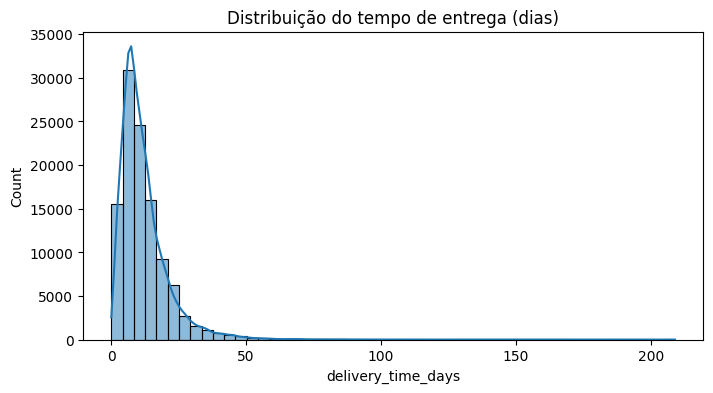

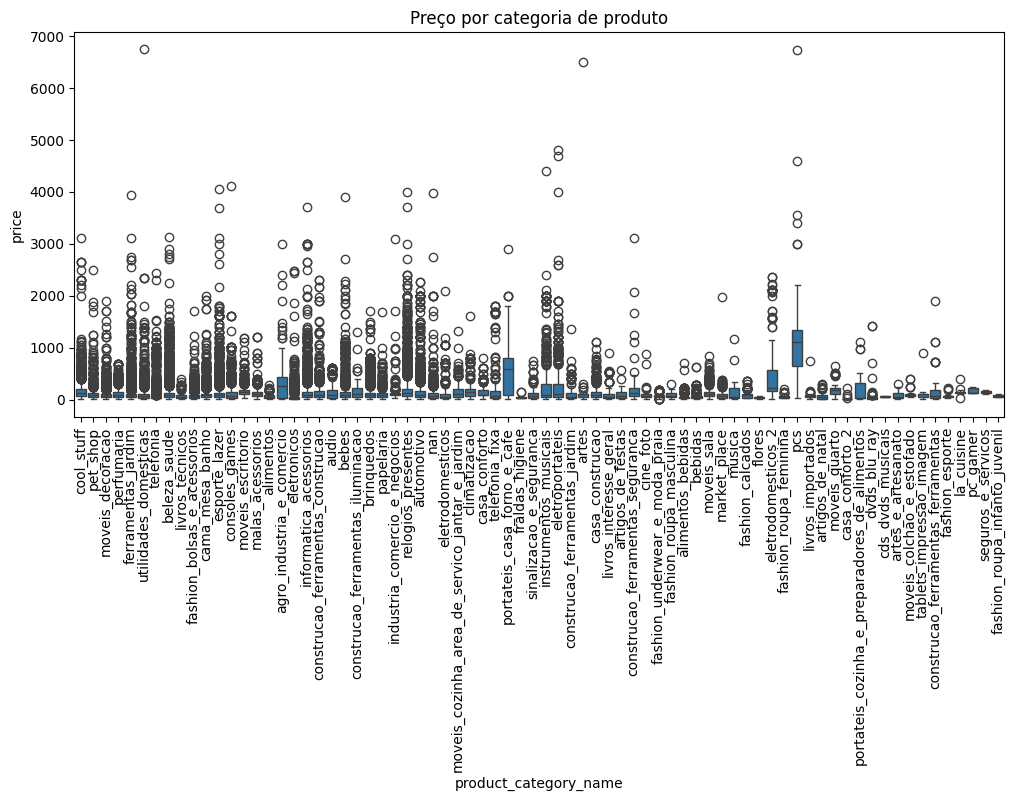

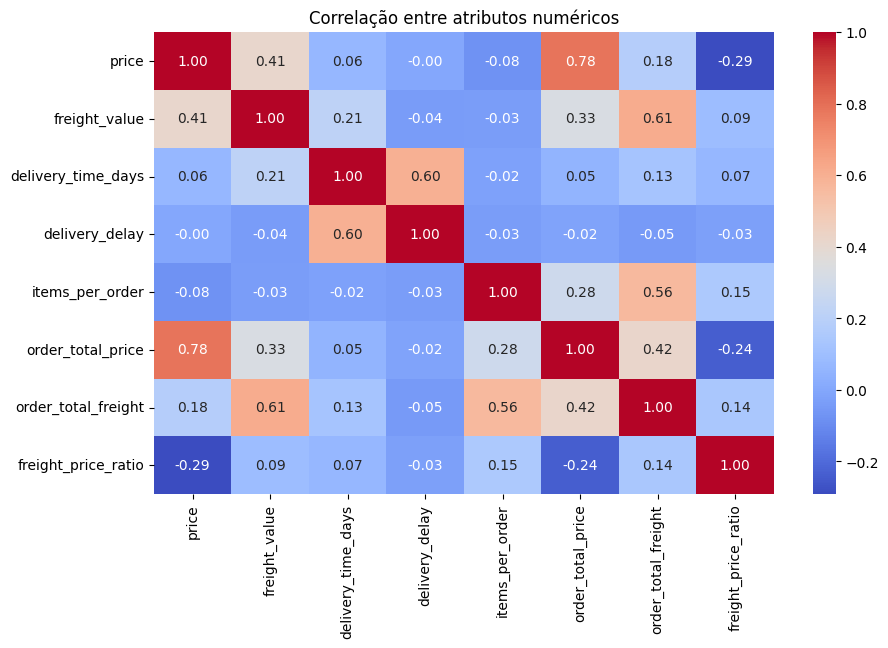

In [47]:
# 13 — VISUALIZAÇÕES
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma do tempo de entrega
plt.figure(figsize=(8,4))
sns.histplot(merged['delivery_time_days'].dropna(), bins=50, kde=True)
plt.title("Distribuição do tempo de entrega (dias)")
plt.show()

# Boxplot preço por categoria
plt.figure(figsize=(12,5))
sns.boxplot(x='product_category_name', y='price', data=merged)
plt.xticks(rotation=90)
plt.title("Preço por categoria de produto")
plt.show()

# Heatmap de correlação
numeric_cols_corr = ['price','freight_value','delivery_time_days','delivery_delay','items_per_order','order_total_price','order_total_freight','freight_price_ratio']
plt.figure(figsize=(10,6))
sns.heatmap(merged[numeric_cols_corr].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre atributos numéricos")
plt.show()

In [48]:
# 14 — INSIGHTS FINAIS
print("Insights identificados:")
print("- Pedidos com maior quantidade de itens tendem a ter valor total maior.")
print("- Algumas categorias apresentam preços muito altos e valores de frete elevados (outliers).")
print("- Atrasos de entrega variam bastante entre categorias de produto e vendedores.")
print("- O frete proporcional ao preço é um bom indicador de logística.")

Insights identificados:
- Pedidos com maior quantidade de itens tendem a ter valor total maior.
- Algumas categorias apresentam preços muito altos e valores de frete elevados (outliers).
- Atrasos de entrega variam bastante entre categorias de produto e vendedores.
- O frete proporcional ao preço é um bom indicador de logística.
